# Ecuación Maestra para la evolución de la población

## Obtención de la Ecuación Maestra

Dada un sistema como el descripto en el archivo `1-populationEvolution.ipynb`, para hallar la dinámica de la distribución de la probabilidad $P(n, t)$ de la cantidad de individuos $A$ en el sistema, tenemos que, tal como hallamos en dicho archivo, las tasas de transición $T(n'|n)$ son:

$$T(n+1|n) = up_\alpha \frac{N-n}{N} + (1-u) p_\nu \frac{n}{N}\frac{N-n}{N-1},$$

$$T(n-1|n) = u p_\mu \frac{n}{N}$$

Luego, la ecuación maestra para un paso de tiempo $t_m$ hacia $t_{m+1}$ es

$$P(n, t_{m+1}) - P(n, t_m) = T(n|n+1)P(n+1, t_m) + T(n|n-1)P(n-1, t_m) - \left(T(n+1|n) - T(n-1|n)\right) P(n, t_m),$$
de modo que reemplazando con las expresiones

$$P(n, t_{m+1}) - P(n, t_m) = u p_\mu \frac{n+1}{N} P(n+1, t_m) + \left( up_\alpha \frac{N-n+1}{N} + (1-u) p_\nu \frac{n-1}{N}\frac{N-n+1}{N-1} \right) P(n-1, t_m) - \\

- \left\{ up_\alpha \frac{N-n}{N} + (1-u) p_\nu \frac{n}{N}\frac{N-n}{N-1} + u p_\mu \frac{n}{N} \right\} P(n, t_m)$$

Hacemos ahora la identificación para los pasos de tiempo

$$t_m \rightarrow t,$$
$$t_{m+1} \rightarrow t+\delta t,$$

donde $\delta t$ es el paso de tiempo de Monte Carlo.



De modo que, ahora podemos denotar al cambio de la probabilidad como

$$P(n, t_{m+1}) - P(n, t_m) = P(n, t+\delta t) - P(n, t) = P(n, t) + \partial_t P(n, t) \delta t- P(n, t) = \partial_t P(n, t) \delta t,$$

para $\delta t$ suficientemente chico. Dado que el lado izquierdo de la igualdad de la Ec. (ref) es del orden de $\delta t$, el lado derecho de la misma debe tener el mismo orden. Para ello, tomaremos las probabilidades $p_\alpha, p_\mu, p\nu$ de este orden, de modo que
$$p_x = \Gamma_x \delta t,$$
donde $\Gamma_x$ es la tasa o la frecuencia a la que ocurre el evento. 
A su vez, se debe tener en cuenta que el paso de tiempo de Monte Carlo no debe ser independiente del tamaño del sistema: es decir, para un dado sistema de tamaño $N$ los pasos de tiempo deben ser inversamente proporcional al dicho tamaño. (Falta justificación) Es decir que tomaremos

$$\delta t = \frac{\Delta t}{N},$$

donde $\Delta t$ es la constante de tiempo (o unidad de tiempo) de todos los sistemas, independientemente del tamaño del sistema.

Por lo tanto,

$$P(n, t_{m+1}) - P(n, t_m) = \partial_t P(n, t) \frac{\Delta t}{N}.$$

Se define

- $up_\alpha:=\alpha \Delta t,$
- $up_\mu:=\mu \Delta t,$
- $(1-u)p_\nu:=\nu \Delta t,$

donde $\alpha,\mu,\nu$ son las frecuencias de los eventos de migración, muerte y nacimiento respectivamente. En particular, $\mu$ representa la vida media de cada sitio.

De esta manera, la ecuación maestra se vuelve independiente de $\Delta T$ y de $u$ como sigue

$$\partial_t P(n, t) = \left( \alpha (N-n+1) + \nu (n-1) \frac{N-n+1}{N-1} \right) P(n-1, t) + \mu(n+1)P(n+1, t) - \left( \alpha (N-n) + \nu n \frac{N-n}{N-1} + \mu n \right) P(n, t).$$

En particular, podemos dividir por la vida media de cada sitio $\mu$, resultando

$$\mu^{-1}\partial_t P(n, t) = \left( \frac{\alpha}{\mu} (N-n+1) + \frac{\nu}{\mu} (n-1) \frac{N-n+1}{N-1} \right) P(n-1, t) + (n+1)P(n+1, t) - \left( \frac{\alpha}{\mu} (N-n) + \frac{\nu}{\mu} n \frac{N-n}{N-1} + n \right) P(n, t).$$

## Existencia del estado estacionario

En particular, tenemos un vector de probabilidades $\vec{P(t)} = \left[ P(0, t), P(1, t), \dots , P(N, t)\right]$, y tenemos el sistema
$$\dot{\vec{P(t)}} = \overline{\overline{M}} \vec{P(t)}.$$

En principio, no es posible resolver el problema analíticamente.

Estamos interesados en particular en las soluciones del estado estacionario, donde la probabilidad no cambia en el tiempo. En dicho caso, 
$$0 = \overline{\overline{M}} \vec{P_{est}}.$$

Resulta entonces que $\vec{P_{est}}$ es un autovector de $\overline{\overline{M}}$ con autovalor nulo. Para que $0$ sea autovalor de $\overline{\overline{M}}$ debe cumplirse que $\text{det}\left\{\overline{\overline{M}}\right\} = 0.$

### Demostración $\text{det}\left(\overline{\overline{M}}\right) = 0.$

Para mostrar que $\text{det}\left(\overline{\overline{M}}\right) = 0$, basta con mostrar que los elementos de cada columna suman cero. Para ello, caractericemos el elemento $M_{i,j}$ de la matriz.

En general, por la ecuación del sistema particular que tenemos, 
$$\partial_t P(i, t) = \sum_{j = 0}^{N} M_{i,j} P(j, t) = M_{i, i-1}P(i-1, t) + M_{i, i}P(i, t) + M_{i, i+1}P(i+1, t)\quad i = 1, 2, \dots , N-1,$$
$$\partial_t P(0, t) = \sum_{j = 0}^{N} M_{0,j} P(j, t) = M_{0, 0} P(0, t) + M_{0, 1} P(1, t),$$
$$\partial_t P(N, t) = \sum_{j = 0}^{N} M_{N,j} P(j, t) = M_{N, N-1} P(N-1, t) + M_{N, N} P(N, t).$$

De esta manera, la matriz $\overline{\overline{M}}$ está compuesta de la siguiente manera

$$ M = \begin{bmatrix}
M_{0,0} & M_{0,1} & 0 & 0 & \dots & 0 & 0 \\
M_{1,0} & M_{1,1} & M_{1,2} & 0 & \dots & 0 & 0 \\
0 & M_{2,1} & M_{2,2} & M_{2,3} & \dots & 0 & 0 \\
0 & 0 & M_{3,2} & M_{3,3} & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & M_{N, N-1} & M_{N,N}
\end{bmatrix}  $$

donde la forma funcional de $M_{i, j}$ viene dada por la siguiente expresión

$$M_{i, j} = -\left[ -\alpha (N-i) + \nu i \frac{N-i}{N-1} \mu i \right]\delta_{i, j} + \left[ \alpha (N-i-1) + \nu (i-1)\frac{N-i+1}{N-1} \right] \delta_{i, j+1} + \mu (i+1) \delta_{i, j-1},$$

donde introducimos la delta de Kronecker $\delta$.

Sea $S_j$ la suma de los elementos de la columna $j$ de la matriz $\overline{\overline{M}}$. Es decir

$$S_j = \sum_{i = 0}^{N} M_{i, j}.$$

Mostraremos explicitamente que $S_j = 0 \quad \forall \quad j \in \{0, 1, \dots, N\}$

- Para $ j = 1, 2, \dots, N-1$, se tiene
$$S_j = M_{j-1, j} + M_{j, j} + M_{j+1,j} = $$
$$\mu (i+1) \Big|_{i = j-1} - \left(\alpha(N-1) + \nu i \frac{N-i}{N-1} + \nu i\right) \Big|_{i = j} + \left(\alpha (N-i+1) \nu (i-1) \frac{N-i-1}{N-1}\right)\Big|_{i = j+1} = $$ 
$$
= \mu j - \left(\alpha (N-j) + \nu j \frac{N-j}{N-1} + \mu j \right) + \alpha (N-j) + \nu j \frac{N-j}{N-1} = 0.
$$

- Para $j = 0$, se tiene

$$S_0 = M_{0, 0} + M_{1, 0} = -\alpha N + \alpha N = 0.$$

- Para $j = N$, se tiene

$$S_N = M_{N-1, N} + M_{N, N} = \mu N - \mu N = 0.$$

Luego $S_j = 0 \quad \Rightarrow \quad \text{det}(\overline{\overline{M}}) = 0 \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\blacksquare$

### Resolución del sistema $P_{est}$ para $\mu = 0$.

En el caso que la frecuencia de nacimiento $\mu = 0$, entonces la ecuación maestra resulta particularmente

$$\partial_t P_{est}^{\mu = 0}(n, t) = \left[\alpha (N-n+1) + \nu(n-1)\frac{N-n+1}{N-1}\right] P_{est}^{\mu = 0}(n-1, t) - \left[\alpha (N-n) + \nu n\frac{N-n}{N-1}\right] P_{est}^{\mu = 0}(n, t) = $$ 
$$ = f(n-1)P_{est}^{\mu = 0}(n-1, t) - f(n) P_{est}^{\mu = 0}(n, t),$$

donde hemos introducido para simplificar notación la función $f$ definida como 

$$f(n) = \alpha (N-n) + \nu n \frac{N-n}{N-1}.$$

En particular, como dijimos, estamos interesados en resolver el caso donde $\partial_t P_{est}^{\mu = 0}(n, t) = 0$.

En dicho caso, 

$$P_{est}^{\mu = 0}(n, t) = \frac{f(n-1)}{f(n)} P_{est}^{\mu = 0}(n-1, t) = \frac{f(n-1)}{f(n)} \frac{f(n-2)}{f(n-1)} _{est}^{\mu = 0}P(n-2, t) = \frac{f(n-2)}{f(n)} P_{est}^{\mu = 0}(n-2, t) \dots = \frac{f(m)}{f(n)} P_{est}^{\mu = 0}(m,t).$$

En particular,  como $P(n, t)$ es una distribución de probabilidades, podemos conocer el valor de $P(m, t)$ como sigue

$$1 = \sum_{n = 0}^{N} P_{est}^{\mu = 0}(n, t) = \sum_{n = 0}^N \frac{f(m)}{f(n)}P_{est}^{\mu = 0}(m, t),$$

$$\boxed{\Rightarrow P_{est}^{\mu = 0}(m, t) = \frac{1}{f(m)}\frac{1}{\sum_{n = 0}^N\frac{1}{f(n)}}}$$

Aquí a un problema que nos acabamos de saltear. Si miramos con cuidado a la función $f$, notamos que la misma posee una raíz para $n = N$. Esto implica que la igualdad que en principio sigue valiendo
$$P_{est}^{\mu = 0}(N) f(N)= P_{est}^{\mu = 0}(m) f(m),$$

Por lo tanto, como $f(m) \neq 0 \quad \forall \quad m \neq N$, sigue que, como $P$ es una distribución de probabilidad,

$$
\boxed{
P_{est}^{\mu = 0}(m) = 0 \quad \forall \quad m \neq N, \quad P_{est}^{\mu = 0}(N) = 1.}$$


Esto, en principio tiene sentido, debido a que bajo la condición $\mu \rightarrow 0 $, la frecuencia de muertes se va a cero y por lo tanto el estado estacionario del sistema termian siendo la población completamente llena, con $n = N$ luego de un cierto tiempo. Y una vez que se llega a ese estadío, no es posible salir de allí.

Pregunta: ¿Es posible obtener una primera aproximación no trivial para $\mu \neq 0$?

## Evoluciones del sistema y caracterización con la ecuación maestra

En lo que sigue haremos una evolución para diferentes valores de rates de $\alpha/\mu$ y $\nu/\mu$. Por simplicidad, establecemos $\mu = 1$ que representa la vida media de los individuos.

### Código

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from librerias.popEvolution import PopulationEvolution
from librerias.popEvolution import PlotPopulationEvolution

In [12]:
# Parameters
u = 0.5             # Single interaction probability
mu = 1              # Frequency of death
alpha = 0.01        # Frequency of expontanical migration
nus = [1, 1.2, 1.4, 1.6, 1.8, 2]              # Frequencies of birth
N = int(20)              # Number of sites
pmu = 0.2           # Probability of death
T = 10000           # Total time

In [13]:
# Population
populations = [PlotPopulationEvolution(N, 0, u, alpha, nu, mu, pmu) for nu in nus]

# Evolutions
for i, pop in enumerate(populations):
    pop.make_evolution(T)

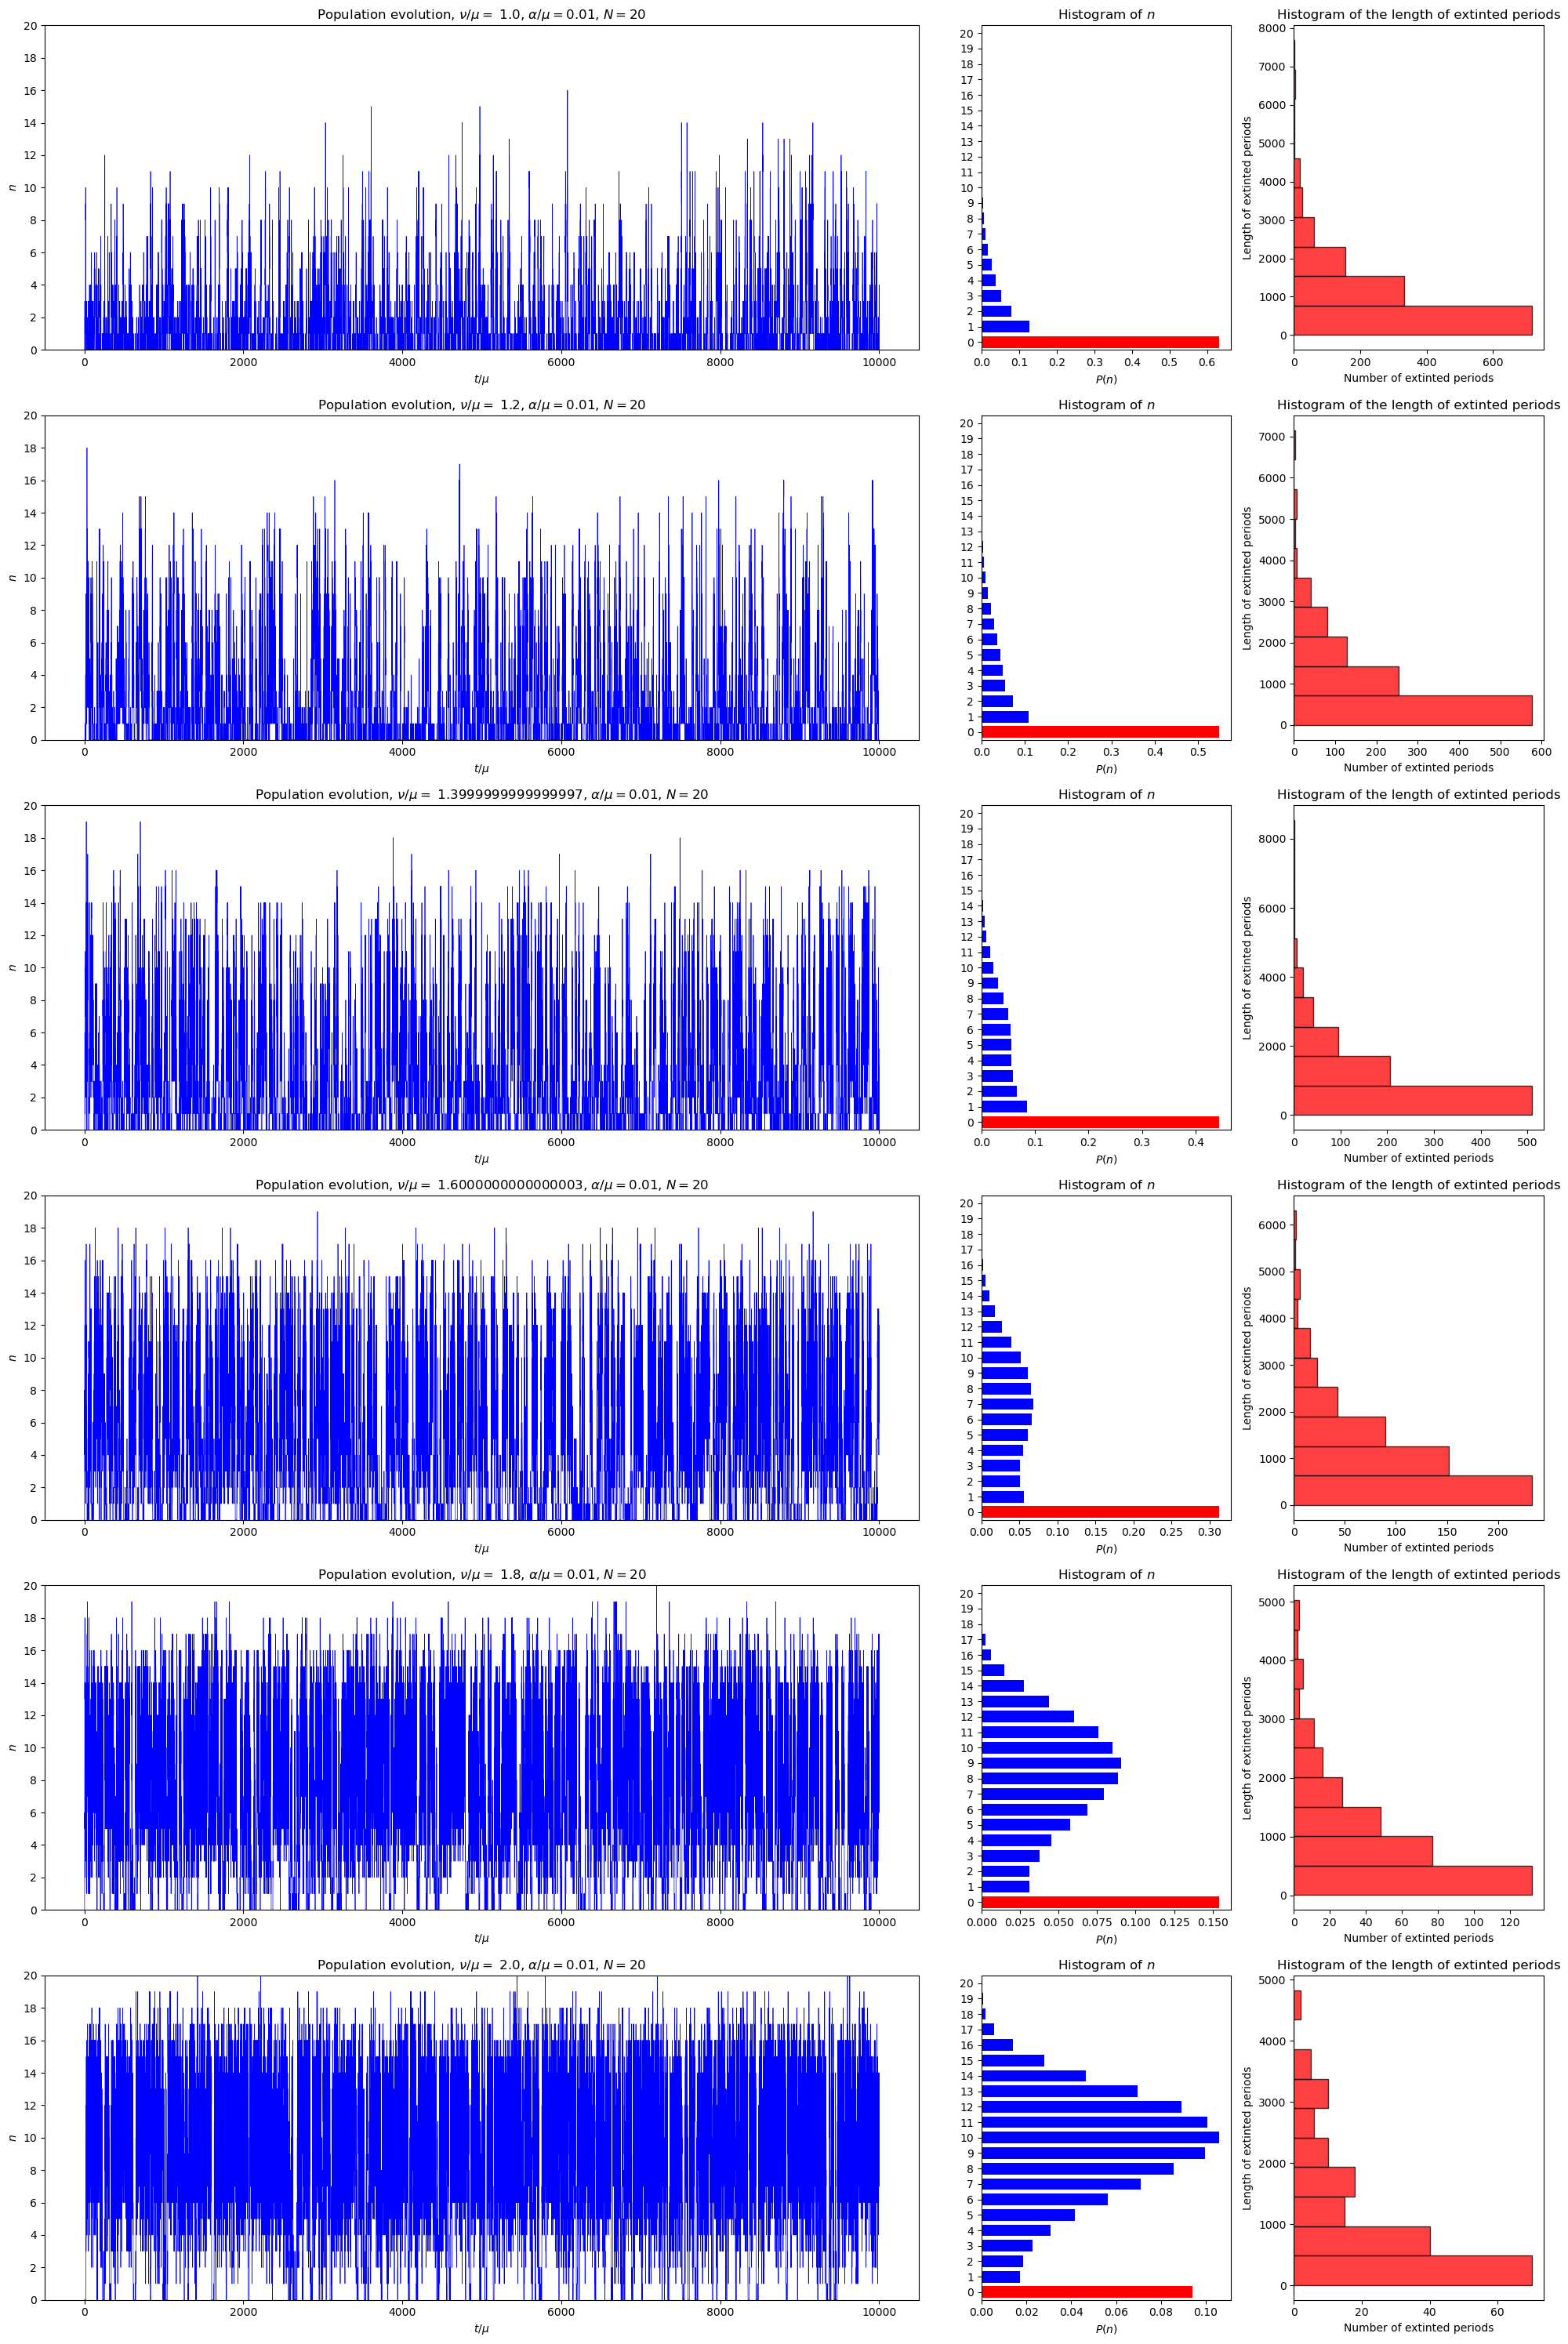

In [15]:
# plot
fig = plt.figure(figsize = (20, 30))
for i, pop in enumerate(populations):
    # subplots of the population
    ax1 = plt.subplot2grid((len(populations), 5), (i, 0), colspan=3)
    ax2 = plt.subplot2grid((len(populations), 5), (i, 3))
    ax3 = plt.subplot2grid((len(populations), 5), (i, 4))
    pop.plot_all([ax1, ax2, ax3])

plt.tight_layout()
plt.show()

### Distribución de longitud de períodos extintos

Notar que la distribución de longitud de períodos extintos en función de la cantidad de veces que ocurre es independiente del valor de $\nu$. Esto es debido a que, cuando se está en una situación de $n = 0$, no importa la frecuencia de nacimiento si no hay individuos disponibles para que nazca uno nuevo. Lo que es claramente dependiente de $\nu$, y sobre todo en este rango de valores, es $P(0)$. Por lo tanto, la cantidad de períodos de extinción es mucho mayor cuanto más disminuye la tasa de nacimiento.

La densidad de probabilidad $f_\alpha(t)$ de longitud de períodos extintos puede ser calculada de manera analítica debido a que, dado el estado en $n(t) = 0$, el rate de que ocurra un proceso de migración, es decir que $n(t+1) = 1$, es de $\lambda = \alpha/\mu\Delta t$. En este caso, la densidad de probabilidad 

$$\boxed{f_\alpha (t) = \lambda e^{-\lambda t}, \quad \lambda = \frac{\alpha}{\mu\Delta t}.}$$

La experanza de una variable aleatoria $X$ que posee esta densidad de probabilidad es

$$E[X] = \frac{1}{\lambda} = \frac{\mu\Delta t}{\alpha},$$ 

mientras que la varianza viene dada por

$$Var[X] = \frac{1}{\lambda^2} = \frac{\mu\Delta t^2}{\alpha^2}.$$ 

### Densidad de probabilidad para el estado estacionario.

Utilizando un software comercial, vamos a hallar de manera analítica para los diferentes valores de $\nu/\mu$ y $\alpha/\mu$, manteniendo fijo el valor de $N = 20$ y ver cómo se contrarresta con lo obtenido en la figura de arriba.

El código utilizado es el siguiente:

```mathematica
(*Definimos los parámetros simbólicamente*)
alpha = \[Alpha];
nu = \[Nu];
mu = 1;

(*Definir una función que construya la matriz para un valor específico de N*)
MatrizTridiagonal[N_Integer] := 
  Table[-((alpha (N - i) + nu i (N - i)/(N - 1) + mu i)) KroneckerDelta[i, j] + 
         (alpha (N - i + 1) + nu (i - 1) (N - i + 1)/(N - 1)) KroneckerDelta[i, j + 1] + 
         mu (i + 1) KroneckerDelta[i, j - 1], {i, 0, N}, {j, 0, N}];

(*Llamar a la función para un valor específico de N*)
M = MatrizTridiagonal[20];
M // MatrixForm 

(*Calcula los autovalores y autovectores*)
eigenvalues = Eigenvalues[M];
eigenvectors = Eigenvectors[M];

(*Encuentra la posición del autovalor 0*)
position = Flatten[Position[eigenvalues, 0]];

(*Obtener el autovector correspondiente al autovalor 0*)
zeroEigenvector = If[Length[position] > 0, eigenvectors[[position]], "No hay autovalor 0"];
zeroEigenvector // MatrixForm

### Cuantificación del cambio del comportamiendo con $\langle n \rangle$ y de $T_{ext}$

Haremos una cuantificación del cambio de comportamiento, mirando cómo cambia el valor medio de $\langle n \rangle$, que es el valor medio de la población en el tiempo sin contar los tiempos donde la población se encuentra extinta, en función de $N$ y $\nu$. Además miraremos el tiempo $T_{ext}$ total donde la población permaneció extinta en función de los mismos parámetros. Los podemos comparar con la cantidad de veces que la población se extinguió. Miraremos cada una por separado y luego haremos un barrido en ambos parámetros.

#### $\langle n \rangle$, $T_{ext}$ $\text{vs}$ $N$

Haremos las simulaciones para $\nu = 2$

##### Código

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from librerias.popEvolution import PopulationEvolution
from librerias.popEvolution import PlotPopulationEvolution

In [14]:
# Parameters
u = 0.5             # Single interaction probability
mu = 1              # Frequency of death
alpha = 0.01        # Frequency of expontanical migration
nu = 2              # Frequencies of birth
pmu = 0.2           # Probability of death
T = 20000           # Total time
N = np.linspace(5, 40, 15, dtype=int)              # Number of sites

In [15]:
# populations and evolutions
populations = [PlotPopulationEvolution(n, 0, u, alpha, nu, mu, pmu) for n in N]

for pop in tqdm(populations):
    pop.make_evolution(T)

100%|██████████| 15/15 [03:22<00:00, 13.52s/it]


In [16]:
n_mean, n_std, T_extint, N_extint = [], [], [], []
for pop in populations:
    n_mean.append(np.mean(pop.get_distribution_of_n_neq_zero()))
    n_std.append(np.std(pop.get_distribution_of_n_neq_zero()))
    T_extint.append(pop.T_ext)
    N_extint.append(pop.N_ext)

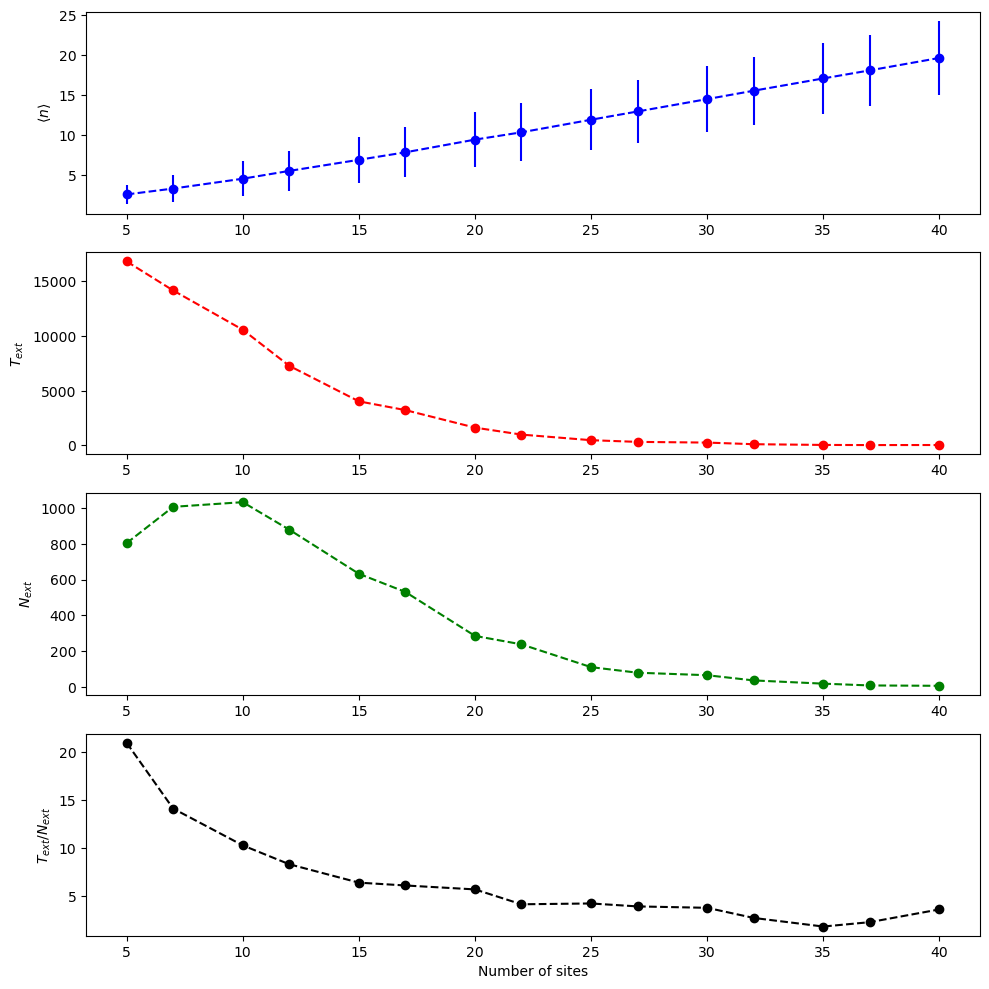

In [20]:
# plot
fig = plt.figure(figsize = (10, 10))
plt.subplot(4, 1, 1)
plt.errorbar(N, n_mean, yerr = n_std, fmt='--o', color='blue')
plt.ylabel(r'$\langle n \rangle$')

plt.subplot(4, 1, 2)
plt.plot(N, T_extint, '--o', color='red')
plt.ylabel(r'$T_{ext}$')

plt.subplot(4, 1, 3)
plt.plot(N, N_extint, '--o', color='green')
plt.ylabel(r'$N_{ext}$')

# i want to see if the cocient of T_extint and N_extint is constant
plt.subplot(4, 1, 4)
plt.plot(N, np.array(T_extint)/np.array(N_extint), '--o', color='black')
plt.xlabel('Number of sites')
plt.ylabel(r'$T_{ext}/N_{ext}$')

plt.tight_layout()

plt.show()

Discutir

#### $\langle n \rangle$, $T_{ext}$ $\text{vs}$ $\mu$

Haremos simulaciones para $N = 20$

##### Código

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from librerias.popEvolution import PlotPopulationEvolution

In [3]:
# Parameters
u = 0.5             # Single interaction probability
mu = 1              # Frequency of death
alpha = 0.01        # Frequency of expontanical migration
nus = np.linspace(0.25, 4, 15)              # Frequencies of birth
pmu = 0.2           # Probability of death
T = 20000           # Total time
N = 20              # Number of sites

In [4]:
# populations and evolutions
populations = [PlotPopulationEvolution(N, 0, u, alpha, nu, mu, pmu) for nu in nus]

for pop in tqdm(populations):
    pop.make_evolution(T)

100%|██████████| 15/15 [02:37<00:00, 10.51s/it]


In [5]:
n_mean, n_std, T_extint, N_extint = [], [], [], []
for pop in populations:
    n_mean.append(np.mean(pop.get_distribution_of_n_neq_zero()))
    n_std.append(np.std(pop.get_distribution_of_n_neq_zero()))
    T_extint.append(pop.T_ext)
    N_extint.append(pop.N_ext)

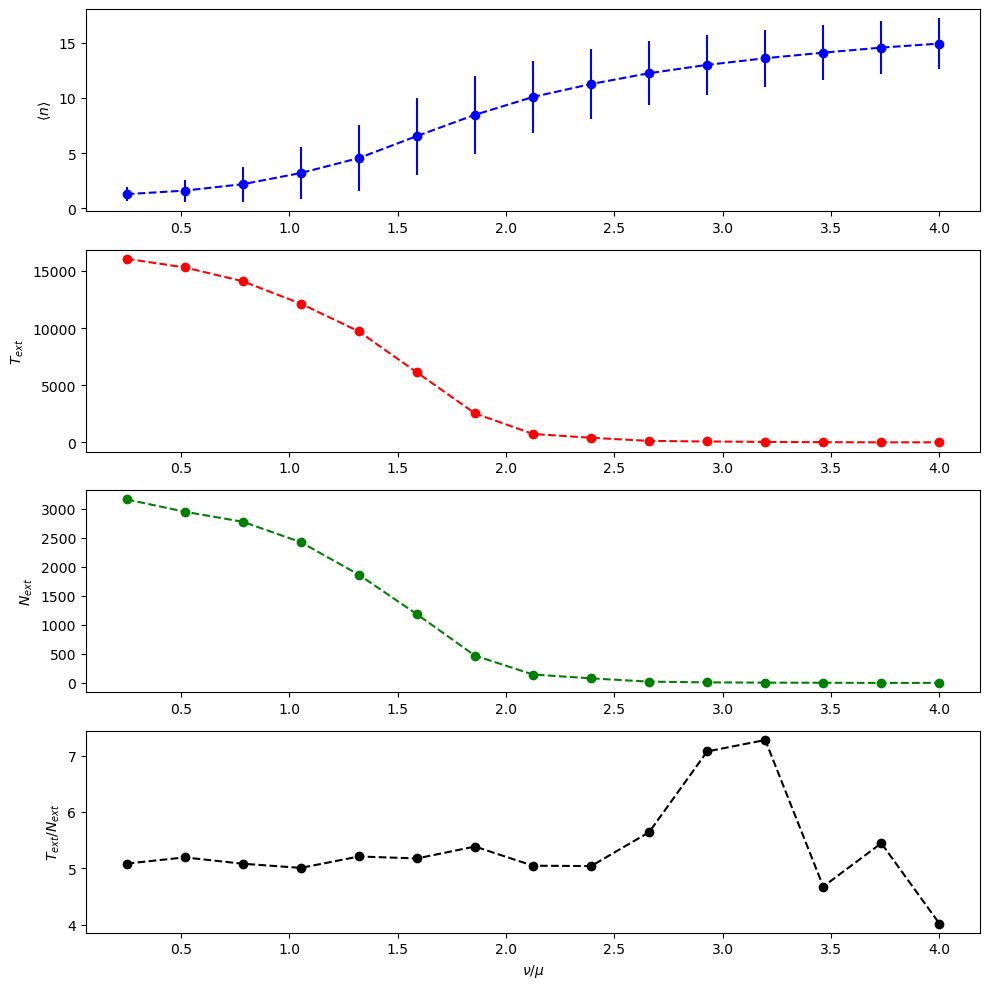

In [6]:
# plot
fig = plt.figure(figsize = (10, 10))
plt.subplot(4, 1, 1)
plt.errorbar(nus, n_mean, yerr = n_std, fmt='--o', color='blue')
plt.ylabel(r'$\langle n \rangle$')

plt.subplot(4, 1, 2)
plt.plot(nus, T_extint, '--o', color='red')
plt.ylabel(r'$T_{ext}$')

plt.subplot(4, 1, 3)
plt.plot(nus, N_extint, '--o', color='green')
plt.ylabel(r'$N_{ext}$')

# i want to see if the cocient of T_extint and N_extint is constant
plt.subplot(4, 1, 4)
plt.plot(nus, np.array(T_extint)/np.array(N_extint), '--o', color='black')
plt.xlabel(r'$\nu/\mu$')
plt.ylabel(r'$T_{ext}/N_{ext}$')

plt.tight_layout()

plt.show()

Discutir

#### $\langle n \rangle$, $T_{ext}$ $\text{vs}$ $N$, $\nu$

In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from librerias.popEvolution import PopulationEvolution

In [10]:
# Parameters
# Parameters
u = 0.5             # Single interaction probability
mu = 1              # Frequency of death
alpha = 0.01        # Frequency of expontanical migration
pmu = 0.2           # Probability of death
T = 1000           # Total time
nus = np.linspace(0.25, 4, 50)                    # Frequencies of birth
Ns = np.linspace(5, 40, 36, dtype=int)             # Number of sites

In [11]:
# simlations
phi_mean = np.zeros((len(Ns), len(nus)))
T_extint = np.zeros((len(Ns), len(nus)))

for i, N in enumerate(tqdm(Ns)):
    for j, nu in enumerate(nus):
        pop = PopulationEvolution(N, 0, u, alpha, nu, mu, pmu)
        pop.make_evolution(T)
        phi_mean[i, j] = np.mean(pop.get_distribution_of_n_neq_zero())
        T_extint[i, j] = pop.T_ext

100%|██████████| 36/36 [18:49<00:00, 31.37s/it]


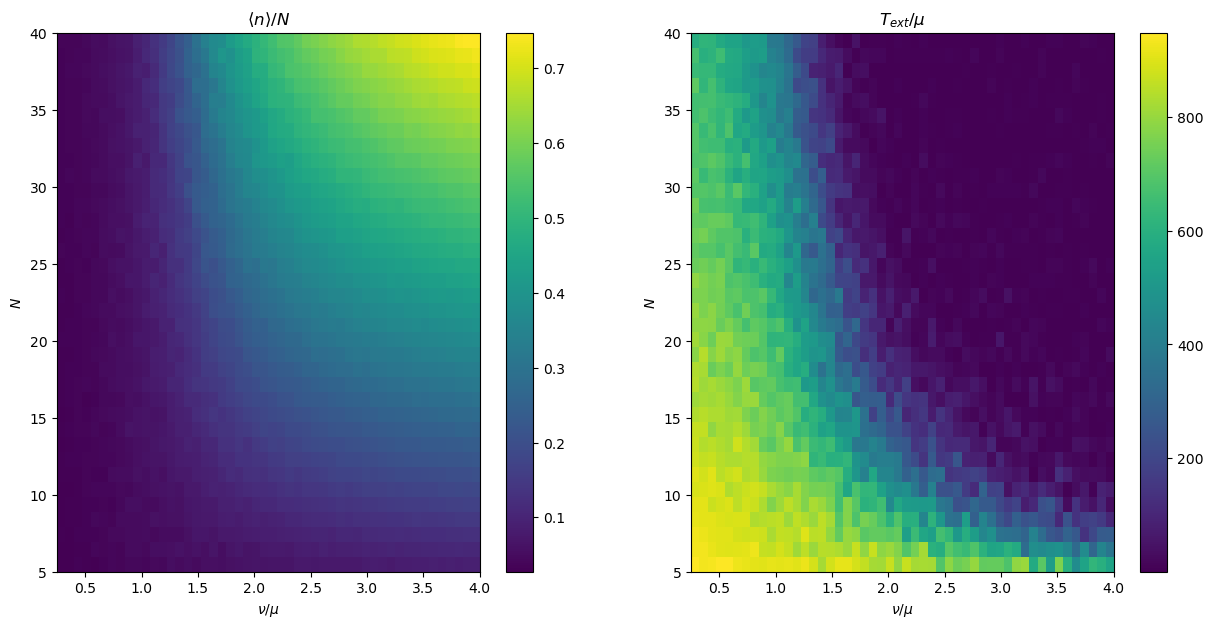

In [22]:
# plots
fig = plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(np.array(phi_mean)/N, origin='lower', extent=[nus[0]/mu, nus[-1]/mu, Ns[0], Ns[-1]], aspect='auto')
plt.colorbar()
plt.xlabel(r"$\nu/\mu$")
plt.ylabel(r"$N$")
plt.title(r"$\langle n \rangle / N$")

plt.subplot(1, 2, 2)
plt.imshow(np.array(T_extint), origin='lower', extent=[nus[0]/mu, nus[-1]/mu, Ns[0], Ns[-1]], aspect='auto')
plt.colorbar()
plt.xlabel(r"$\nu/\mu$")
plt.ylabel(r"$N$")
plt.title(r"$T_{ext}$")


plt.show()